In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
classes = [
    'Bird Drop',
    'Clean',
    'Dusty',
    'Electrical Damage',
    'Physical Damage',
    'Snow-covered'
]

In [3]:
# Adds best model run for image prediction
model = torch.load('Best-Model.pth')

In [4]:
mean = [0.4243, 0.4522, 0.5050]
std = [0.2150, 0.2035, 0.1913]

image_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [5]:
def classify_single_image(model, image_transforms, image_path, classes):
    model = model.eval()
    image = Image.open(image_path)
    image = image_transforms(image).float()
    image = image.unsqueeze(0)

    output = model(image)
    _, prediction = torch.max(output.data, 1)

    return(classes[prediction.item()])

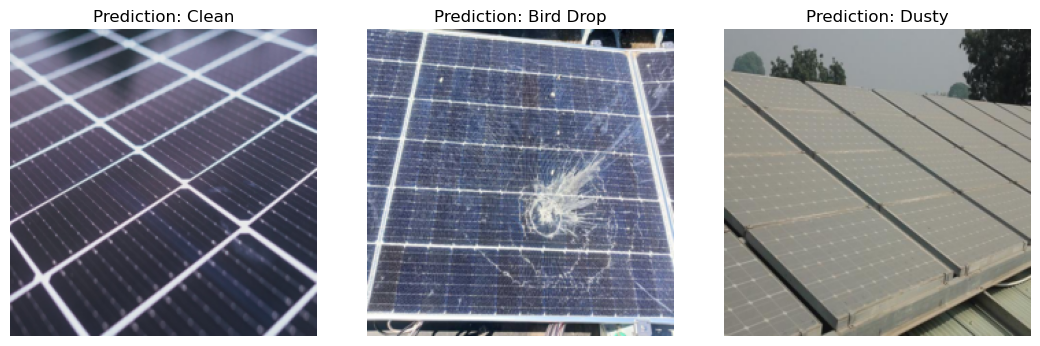

In [12]:
test_dataset_path = './Validation'

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.ImageFolder(root=test_dataset_path, transform=test_transforms)

plt.figure(figsize=(18, 10))

num_samples_to_display = 3
for idx, (images, labels) in enumerate(torch.utils.data.DataLoader(test_dataset, batch_size=3, shuffle=True)):
    for i in range(num_samples_to_display):
        if idx * num_samples_to_display + i >= len(images):
            break
        image = (images[i].numpy() * 255).astype("uint8")
        label = labels[i]
        image_path = test_dataset.samples[idx * num_samples_to_display + i][0]

        # Create a subplot
        plt.subplot(3, 5, i + 1)
        plt.imshow(np.transpose(image, (1, 2, 0)))
        plt.axis('off')
        plt.title(f'Prediction: {classify_single_image(model, image_transforms, image_path, classes)}')

plt.tight_layout()
plt.show()
